<a href="https://colab.research.google.com/github/varaprasad7006/SatyaVaraPrasad_INFO5731_Spring2025024/blob/main/satyavaraprasad_namala_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
import pandas as pd
df = pd.read_csv("reviews_cleaned (2).csv")

In [3]:
df.head()

,review,Cleaned_text
0,Best movie ever. Heath ledger's work is phenom...,best movi ever heath ledger work is phenomen n...
1,This movie is a work of art. The finest sequel...,thi movi is a work of art the finest sequel ev...
2,It is just what you want for the best movie. G...,it is just what you want for the best movi gre...
3,"Confidently directed, dark, brooding, and pack...",confid direct dark brood and pack with impress...
4,We've been subjected to enormous amounts of hy...,weve been subject to enorm amount of hype and ...


In [4]:
import pandas as pd
from collections import Counter



# Ensure 'Cleaned_text' column is a list of strings
documents = df['Cleaned_text'].dropna().astype(str).tolist()

# Initialize counters for bigrams and trigrams
bigram_counts = Counter()
trigram_counts = Counter()

# Iterate over each document
for text in documents:
    # Tokenize the text into words
    tokens = text.lower().split()

    # Generate and count bigrams
    for i in range(len(tokens) - 1):
        bigram = tuple(tokens[i:i + 2])
        bigram_counts[bigram] += 1

    # Generate and count trigrams
    for i in range(len(tokens) - 2):
        trigram = tuple(tokens[i:i + 3])
        trigram_counts[trigram] += 1

# Convert counters to DataFrames for better visualization
bigram_df = pd.DataFrame(bigram_counts.items(), columns=["Bigram", "Frequency"]).sort_values(by="Frequency", ascending=False)
trigram_df = pd.DataFrame(trigram_counts.items(), columns=["Trigram", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Display the results
print("Top Bigrams:")
print(bigram_df.head())

print("\nTop Trigrams:")
print(trigram_df.head())

# Save the bigram and trigram frequency data to CSV files for easy access
bigram_csv_path = "bigram_frequency.csv"
trigram_csv_path = "trigram_frequency.csv"

bigram_df.to_csv(bigram_csv_path, index=False)
trigram_df.to_csv(trigram_csv_path, index=False)

print(f"\nBigram frequencies saved to: {bigram_csv_path}")
print(f"Trigram frequencies saved to: {trigram_csv_path}")


Top Bigrams:
              Bigram  Frequency
161        (of, the)       1329
53    (dark, knight)        956
52       (the, dark)        923
290     (the, joker)        810
3    (heath, ledger)        773

Top Trigrams:
                  Trigram  Frequency
53    (the, dark, knight)        873
175        (one, of, the)        358
54     (dark, knight, is)        351
1716      (of, the, best)        170
8         (thi, movi, is)        160

Bigram frequencies saved to: bigram_frequency.csv
Trigram frequencies saved to: trigram_frequency.csv


In [5]:
import pandas as pd
from collections import Counter


# Ensure 'Cleaned_text' column is a list of strings
documents = df['Cleaned_text'].dropna().astype(str).tolist()

def tokenize(text):
    """Tokenizes text into words, removing extra spaces."""
    return text.lower().split()

def generate_ngrams(tokens, n):
    """Generates N-grams from a list of tokens."""
    return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

def count_ngrams(ngrams_list):
    """Counts the frequency of N-grams."""
    return Counter(ngrams_list)

def calculate_unigram_counts(documents):
    """Calculates unigram (single word) frequencies."""
    unigram_counts = Counter()
    for text in documents:
        tokens = tokenize(text)
        unigram_counts.update(tokens)
    return unigram_counts

def calculate_bigram_probabilities(bigram_counts, unigram_counts):
    """Calculates bigram probabilities."""
    bigram_probabilities = {}
    for bigram, bigram_count in bigram_counts.items():
        w1 = bigram[0]  # First word in the bigram
        if w1 in unigram_counts:
            bigram_probabilities[bigram] = bigram_count / unigram_counts[w1]
    return bigram_probabilities

# Aggregate all bigrams
all_bigrams = []
for text in documents:
    tokens = tokenize(text)
    all_bigrams.extend(generate_ngrams(tokens, 2))

# Count frequencies
bigram_counts = count_ngrams(all_bigrams)
unigram_counts = calculate_unigram_counts(documents)

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(bigram_counts, unigram_counts)

# Convert to DataFrame for better visualization
bigram_prob_df = pd.DataFrame(bigram_probabilities.items(), columns=["Bigram", "Probability"]).sort_values(by="Probability", ascending=False)

# Save to CSV for downloading
bigram_prob_csv_path = "bigram_probabilities.csv"
bigram_prob_df.to_csv(bigram_prob_csv_path, index=False)

# Provide the download link
print(f"Bigram probabilities saved to: {bigram_prob_csv_path}")


Bigram probabilities saved to: bigram_probabilities.csv


In [6]:
import csv

# Specify the path to your CSV file
csv_file_path = 'bigram_probabilities.csv'

# Open and read the CSV file
with open(csv_file_path, mode='r', newline='') as file:
    csv_reader = csv.reader(file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        print(row)


Streaming output truncated to the last 5000 lines.
["('by', 'though')", '0.0013568521031207597']
["('by', 'micheal')", '0.0013568521031207597']
["('by', 'some')", '0.0013568521031207597']
["('by', 'everyth')", '0.0013568521031207597']
["('by', 'thi')", '0.0013568521031207597']
["('by', 'ten')", '0.0013568521031207597']
["('by', 'view')", '0.0013568521031207597']
["('by', 'ad')", '0.0013568521031207597']
["('by', 'other')", '0.0013568521031207597']
["('by', 'about')", '0.0013568521031207597']
["('by', 'not')", '0.0013568521031207597']
["('by', 'that')", '0.0013568521031207597']
["('by', 'talent')", '0.0013568521031207597']
["('by', 'himlook')", '0.0013568521031207597']
["('by', 'default')", '0.0013568521031207597']
["('by', 'mani')", '0.0013568521031207597']
["('by', 'gari')", '0.0013568521031207597']
["('by', 'mark')", '0.0013568521031207597']
["('by', 'pierc')", '0.0013568521031207597']
["('by', 'what')", '0.0013568521031207597']
["('by', 'jame')", '0.0013568521031207597']
["('by', 's

In [10]:
import re
from collections import Counter
import pandas as pd

# Sample data: Replace this with your actual dataset
data = df['Cleaned_text']
# Initialize a Counter to hold noun-like phrase frequencies
noun_phrase_counts = Counter()

# Process each text entry in the dataset
for text in data:
    # Tokenize the text into words using regular expressions
    words = re.findall(r'\b\w+\b', text.lower())

    # List to collect current noun-like phrase
    current_phrase = []

    # Iterate over each word to identify noun-like phrases
    for word in words:
        # Check if the word ends with 's', 'n', or 'e' (indicative of nouns)
        if word.endswith(('s', 'n', 'e')):
            current_phrase.append(word)
        else:
            if current_phrase:
                # Join collected words into a phrase and update the counter
                phrase = ' '.join(current_phrase)
                noun_phrase_counts[phrase] += 1
                current_phrase = []

    # Check if there's any remaining phrase to add after the loop
    if current_phrase:
        phrase = ' '.join(current_phrase)
        noun_phrase_counts[phrase] += 1

# Determine the maximum frequency for normalization
max_frequency = max(noun_phrase_counts.values()) if noun_phrase_counts else 1

# Prepare results with relative probabilities
results = []
for text in data:
    words = re.findall(r'\b\w+\b', text.lower())
    current_phrase = []
    phrase_frequencies = Counter()

    for word in words:
        if word.endswith(('s', 'n', 'e')):
            current_phrase.append(word)
        else:
            if current_phrase:
                phrase = ' '.join(current_phrase)
                phrase_frequencies[phrase] += 1
                current_phrase = []

    if current_phrase:
        phrase = ' '.join(current_phrase)
        phrase_frequencies[phrase] += 1

    # Calculate relative probabilities
    relative_probabilities = {phrase: count / max_frequency for phrase, count in phrase_frequencies.items()}

    # Append the result for the current text
    results.append({
        "Text": text,
        "Relative Probabilities": relative_probabilities
    })

# Convert results to a DataFrame for better visualization
df_results = pd.DataFrame(results)

# Display the results
for index, row in df_results.iterrows():
    print(f"Text: {row['Text']}")
    print("Relative Probabilities:")
    for phrase, prob in row['Relative Probabilities'].items():
        print(f"  {phrase}: {prob:.4f}")
    print('-' * 50)


Text: best movi ever heath ledger work is phenomen no word
Relative Probabilities:
  is phenomen: 0.0001
--------------------------------------------------
Text: thi movi is a work of art the finest sequel ever made i dont think we will see anoth movi like thi for a long time heath ledger joker is the best movi characht i have ever seen by far aveng endgam is great but the dark knight is much better the best batman ever the best joker ever the best dc movi ever the best superhero movi ever ando for me the best movi ever
Relative Probabilities:
  is: 0.0004
  the: 0.0008
  made: 0.0001
  we: 0.0001
  see: 0.0001
  like: 0.0001
  time: 0.0001
  is the: 0.0001
  have: 0.0001
  seen: 0.0001
  batman: 0.0001
  me the: 0.0001
--------------------------------------------------
Text: it is just what you want for the best movi great stori great act thrill twist just watch joker in i just ha to come back and give dark knight a and thank to heath ledger for the except perform
Relative Probabiliti

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [15]:
df.columns

Index(['review', 'Cleaned_text'], dtype='object')

In [18]:
import re
import math
import pandas as pd
from collections import defaultdict

def compute_tfidf(dataframe, column_name):
    """
    Computes the TF-IDF matrix for a given column in a DataFrame.
    :param dataframe: pandas DataFrame containing text data.
    :param column_name: Column name with text data.
    :return: List of dictionaries representing the TF-IDF values per document.
    """
    # Extract text corpus
    text_data = dataframe[column_name].tolist()
    total_docs = len(text_data)
    tf_list, idf_dict, doc_word_count = [], defaultdict(float), defaultdict(int)

    # Calculate Term Frequency (TF)
    doc_idx = 0
    while doc_idx < total_docs:
        doc_text = text_data[doc_idx]
        words = re.findall(r'\b\w+\b', doc_text.lower())
        total_words = len(words)
        tf_scores = defaultdict(float)

        for w in words:
            tf_scores[w] += 1

        for term in tf_scores:
            tf_scores[term] /= total_words

        tf_list.append(tf_scores)
        doc_idx += 1

    # Calculate Document Frequency (DF)
    for doc_text in text_data:
        seen_words = set(re.findall(r'\b\w+\b', doc_text.lower()))
        for word in seen_words:
            doc_word_count[word] += 1

    # Calculate Inverse Document Frequency (IDF)
    for term, count in doc_word_count.items():
        idf_dict[term] = math.log((1 + total_docs) / (1 + count)) + 1

    # Compute TF-IDF scores
    tfidf_matrix = []
    for tf_scores in tf_list:
        tfidf_values = {}
        for term, tf_val in tf_scores.items():
            tfidf_values[term] = tf_val * idf_dict.get(term, 0)
        tfidf_matrix.append(tfidf_values)

    return tfidf_matrix

tfidf_result = compute_tfidf(df, 'Cleaned_text')

# Display TF-IDF values
doc_num = 1
for doc_tfidf in tfidf_result:
    print(f"Document {doc_num}:")
    sorted_terms = sorted(doc_tfidf.items(), key=lambda item: item[1], reverse=True)
    for term, score in sorted_terms[:10]:  # Displaying top 10 terms per document
        print(f"  {term}: {score:.4f}")
    print()
    doc_num += 1


Document 1:
  phenomen: 0.3646
  word: 0.3618
  work: 0.2878
  no: 0.2449
  ever: 0.2119
  best: 0.1692
  heath: 0.1512
  ledger: 0.1497
  movi: 0.1270
  is: 0.1215

Document 2:
  ever: 0.1952
  best: 0.1336
  the: 0.1151
  movi: 0.1003
  endgam: 0.0785
  ando: 0.0785
  characht: 0.0725
  finest: 0.0676
  aveng: 0.0653
  is: 0.0640

Document 3:
  just: 0.1509
  great: 0.1086
  twist: 0.0985
  thrill: 0.0980
  except: 0.0922
  back: 0.0912
  thank: 0.0861
  for: 0.0816
  give: 0.0740
  want: 0.0735

Document 4:
  careerdefin: 0.1295
  confid: 0.1128
  tdk: 0.1092
  a: 0.1064
  pack: 0.1002
  brood: 0.0907
  impress: 0.0902
  remain: 0.0897
  turn: 0.0875
  worthi: 0.0863

Document 5:
  the: 0.0905
  a: 0.0537
  and: 0.0455
  great: 0.0375
  dialog: 0.0363
  that: 0.0360
  charact: 0.0346
  of: 0.0338
  it: 0.0323
  anarchi: 0.0316

Document 6:
  the: 0.0806
  stun: 0.0652
  is: 0.0598
  a: 0.0589
  someth: 0.0532
  believ: 0.0506
  grotesqu: 0.0489
  that: 0.0489
  fortun: 0.0478
  matu

In [26]:
df.columns

Index(['review', 'Cleaned_text'], dtype='object')

In [32]:
import pandas as pd
import math
from collections import Counter, defaultdict

def compute_tfidf_and_rank(dataframe, column_name, query_text, top_n=5):
    """
    Computes the TF-IDF matrix and ranks documents based on cosine similarity with a given query.
    :param dataframe: pandas DataFrame containing text data.
    :param column_name: Column name with text data.
    :param query_text: Query string to compare against documents.
    :param top_n: Number of top-ranked documents to return.
    """
    # Preprocessing
    dataframe = dataframe.dropna(subset=[column_name])
    dataframe[column_name] = dataframe[column_name].astype(str)
    doc_list = dataframe[column_name].tolist()
    total_docs = len(doc_list)

    # Compute Term Frequency (TF)
    tf_matrix = []
    for doc in doc_list:
        words = doc.split()
        word_freq = Counter(words)
        total_words = len(words) or 1  # Avoid division by zero
        tf_scores = {word: word_freq[word] / total_words for word in word_freq}
        tf_matrix.append(tf_scores)

    # Compute Inverse Document Frequency (IDF)
    idf_scores = defaultdict(int)
    for doc in doc_list:
        unique_terms = set(doc.split())
        for term in unique_terms:
            idf_scores[term] += 1

    for term in idf_scores:
        idf_scores[term] = math.log((total_docs + 1) / (idf_scores[term] + 1)) + 1

    # Compute TF-IDF Matrix
    tfidf_matrix = []
    for tf_scores in tf_matrix:
        tfidf_scores = {word: tf_scores[word] * idf_scores.get(word, 0) for word in tf_scores}
        tfidf_matrix.append(tfidf_scores)

    # Compute TF-IDF for Query
    query_terms = query_text.split()
    query_freq = Counter(query_terms)
    total_query_terms = len(query_terms) or 1
    query_tf = {word: query_freq[word] / total_query_terms for word in query_freq}
    query_tfidf = {word: query_tf[word] * idf_scores.get(word, 0) for word in query_tf}

    # Function to calculate cosine similarity
    def cosine_similarity(vec1, vec2):
        common_words = set(vec1.keys()).union(set(vec2.keys()))
        dot_product = sum(vec1.get(word, 0) * vec2.get(word, 0) for word in common_words)
        mag1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
        mag2 = math.sqrt(sum(val ** 2 for val in vec2.values()))
        return dot_product / (mag1 * mag2) if mag1 and mag2 else 0.0

    # Rank documents based on similarity
    similarity_scores = [(idx, cosine_similarity(query_tfidf, tfidf_matrix[idx])) for idx in range(len(tfidf_matrix))]
    similarity_scores.sort(key=lambda x: x[1], reverse=True)

    print("\n=========== Top Ranked Documents ===========")
    for rank, (idx, score) in enumerate(similarity_scores[:top_n]):
        print(f"\n Rank {rank + 1} | Document ID: {idx + 1}")
        print(f" Similarity Score: {score:.4f}")
        print(f" Abstract: \n{dataframe.iloc[idx][column_name]}")
        print("-" * 80)

query_text = "Themes of time manipulation and non-linear storytelling in Christopher Nolan’s films."
compute_tfidf_and_rank(df, 'Cleaned_text', query_text)



=========== Top Ranked Documents ===========

 Rank 1 | Document ID: 852
 Similarity Score: 0.4290
 Abstract: 
best comic movi and one of the best movi of all time
--------------------------------------------------------------------------------

 Rank 2 | Document ID: 815
 Similarity Score: 0.3267
 Abstract: 
the dark knight serv a both the titl of the film and a it final purpos ie it a play on the phrase white knight at the essenc of thi film is an extrem simpl stori complic rather enhanc by a seri of develop trigger by the introduct of said dark knight in the previou film and their consequ the core of the movi is bruce wayn origin have intend to serv a a hero for a time desper cling to the hope of rachel daw and her promis of wait for him in the last chapter but her heart is elsewher on the flipsid everyth is troubl by the innerwork of a clownappar madman without a purpos christian bale is except here play the role of both batman and bruce wayn differ one of the onli actor to ever r

In [37]:
import math
from collections import Counter, defaultdict

# Preprocess the dataset
df = df.dropna(subset=['Cleaned_text'])
df['Cleaned_text'] = df['Cleaned_text'].astype(str)
doc_collection = df['Cleaned_text'].tolist()
total_docs = len(doc_collection)

# Compute TF-IDF Matrix
tf_matrix = []
idf_scores = defaultdict(int)
doc_index = 0

while doc_index < total_docs:
    words = doc_collection[doc_index].split()
    word_count = Counter(words)
    total_words = len(words) if words else 1
    tf_scores = {}

    word_index = 0
    unique_words = list(word_count.keys())
    while word_index < len(unique_words):
        word = unique_words[word_index]
        tf_scores[word] = word_count[word] / total_words
        word_index += 1

    tf_matrix.append(tf_scores)

    unique_words_set = set(words)
    word_index = 0
    unique_words_list = list(unique_words_set)

    while word_index < len(unique_words_list):
        idf_scores[unique_words_list[word_index]] += 1
        word_index += 1

    doc_index += 1

word_index = 0
idf_keys = list(idf_scores.keys())

while word_index < len(idf_keys):
    word = idf_keys[word_index]
    idf_scores[word] = math.log((total_docs + 1) / (idf_scores[word] + 1)) + 1
    word_index += 1

tfidf_matrix = []
doc_index = 0

while doc_index < len(tf_matrix):
    tf_dict = tf_matrix[doc_index]
    tfidf_doc = {}

    word_index = 0
    tf_words = list(tf_dict.keys())

    while word_index < len(tf_words):
        word = tf_words[word_index]
        tfidf_doc[word] = tf_dict[word] * idf_scores.get(word, 0)
        word_index += 1

    tfidf_matrix.append(tfidf_doc)
    doc_index += 1

query_text = "Mind-bending narratives, time manipulation, and nonlinear storytelling in Christopher Nolan films."
query_words = query_text.split()
query_word_count = Counter(query_words)
total_query_words = len(query_words) if query_words else 1

query_tf = {}
word_index = 0
unique_query_words = list(query_word_count.keys())

while word_index < len(unique_query_words):
    word = unique_query_words[word_index]
    query_tf[word] = query_word_count[word] / total_query_words
    word_index += 1

query_tfidf = {}
word_index = 0
query_tf_keys = list(query_tf.keys())

while word_index < len(query_tf_keys):
    word = query_tf_keys[word_index]
    query_tfidf[word] = query_tf[word] * idf_scores.get(word, 0)
    word_index += 1

# Compute Cosine Similarity
similarity_scores = []
doc_index = 0

while doc_index < len(tfidf_matrix):
    vec1 = query_tfidf
    vec2 = tfidf_matrix[doc_index]
    common_words = set(vec1.keys()).union(set(vec2.keys()))

    dot_product = 0
    magnitude_1 = 0
    magnitude_2 = 0

    word_index = 0
    common_words_list = list(common_words)

    while word_index < len(common_words_list):
        word = common_words_list[word_index]
        dot_product += vec1.get(word, 0) * vec2.get(word, 0)
        magnitude_1 += vec1.get(word, 0) ** 2
        magnitude_2 += vec2.get(word, 0) ** 2
        word_index += 1

    magnitude_1 = math.sqrt(magnitude_1)
    magnitude_2 = math.sqrt(magnitude_2)

    similarity_score = dot_product / (magnitude_1 * magnitude_2) if magnitude_1 and magnitude_2 else 0.0
    similarity_scores.append((doc_index, similarity_score))

    doc_index += 1

# Rank Documents
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Display Top 5 Ranked Documents
print("\n=== Top Matched Documents ===\n")
rank = 0
while rank < 5 and rank < len(similarity_scores):
    doc_idx, similarity_score = similarity_scores[rank]
    print(f" Rank {rank + 1}: Document {doc_idx + 1} - Similarity: {similarity_score:.4f}")
    print(f" Abstract:\n{df.iloc[doc_idx]['Cleaned_text']}\n")
    print("." * 50)
    rank += 1



=== Top Matched Documents ===

 Rank 1: Document 79 - Similarity: 0.3055
 Abstract:
i watch the movi time and in mani case just for the soundtrack

..................................................
 Rank 2: Document 168 - Similarity: 0.3055
 Abstract:
i watch the movi time and in mani case just for the soundtrack

..................................................
 Rank 3: Document 339 - Similarity: 0.3055
 Abstract:
i watch the movi time and in mani case just for the soundtrack

..................................................
 Rank 4: Document 593 - Similarity: 0.3055
 Abstract:
i watch the movi time and in mani case just for the soundtrack

..................................................
 Rank 5: Document 963 - Similarity: 0.3055
 Abstract:
i watch the movi time and in mani case just for the soundtrack

..................................................


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [39]:
import re
import pandas as pd

# Define a custom stopword list for Christopher Nolan's movies
nolan_stopwords = set([
    "the", "a", "an", "and", "of", "to", "in", "on", "for", "with", "by", "at", "as", "about", "into",
    "through", "between", "after", "before", "above", "below", "from", "up", "down", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "some", "such", "no", "nor", "not", "only", "same", "so",
    "than", "too", "very", "can", "will", "just", "now", "but", "or", "because", "while", "what",
    "which", "who", "whom", "this", "that", "these", "those", "is", "are", "was", "were", "be", "been",
    "being", "have", "has", "had", "having", "do", "does", "did", "doing", "i", "me", "my", "myself",
    "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him",
    "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves",

    # Christopher Nolan movie-related common words
    "movie", "film", "films", "cinema", "screen", "story", "stories", "plot", "character", "characters",
    "scene", "scenes", "actor", "actors", "director", "directing", "performance", "dialogue", "audience",
    "visual", "effects", "shot", "shots", "cinematography", "screenplay", "script", "production",

    # Nolan-specific themes
    "time", "dream", "reality", "memory", "inversion", "future", "past", "present", "loop", "identity",
    "perception", "universe", "dimension", "entropy", "gravity", "blackhole", "parallel", "war", "soldier",
    "mind", "thought", "subconscious", "illusion", "fate", "destiny", "mystery",

    # Nolan movie titles and character names (to filter out common ones)
    "inception", "interstellar", "tenet", "memento", "dunkirk", "batman", "dark", "knight", "begins",
    "rises", "prestige", "cobb", "coop", "bruce", "wayne", "borden", "olivia", "michael", "nolan"
])

# Function to preprocess text (specific to Nolan-related abstracts)
def preprocess_nolan(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    tokens = text.split()  # Tokenize by splitting on spaces
    tokens = [word for word in tokens if word not in nolan_stopwords and len(word) > 1]  # Remove stopwords and short words
    return tokens

# Apply preprocessing to 'clean_abstract' column
df['tokens'] = df['Cleaned_text'].apply(preprocess_nolan)

# Display the first few rows of the processed data
df[['Cleaned_text', 'tokens']].head()


,Cleaned_text,tokens
0,best movi ever heath ledger work is phenomen n...,"[best, movi, ever, heath, ledger, work, phenom..."
1,thi movi is a work of art the finest sequel ev...,"[thi, movi, work, art, finest, sequel, ever, m..."
2,it is just what you want for the best movi gre...,"[want, best, movi, great, stori, great, act, t..."
3,confid direct dark brood and pack with impress...,"[confid, direct, brood, pack, impress, action,..."
4,weve been subject to enorm amount of hype and ...,"[weve, subject, enorm, amount, hype, market, w..."


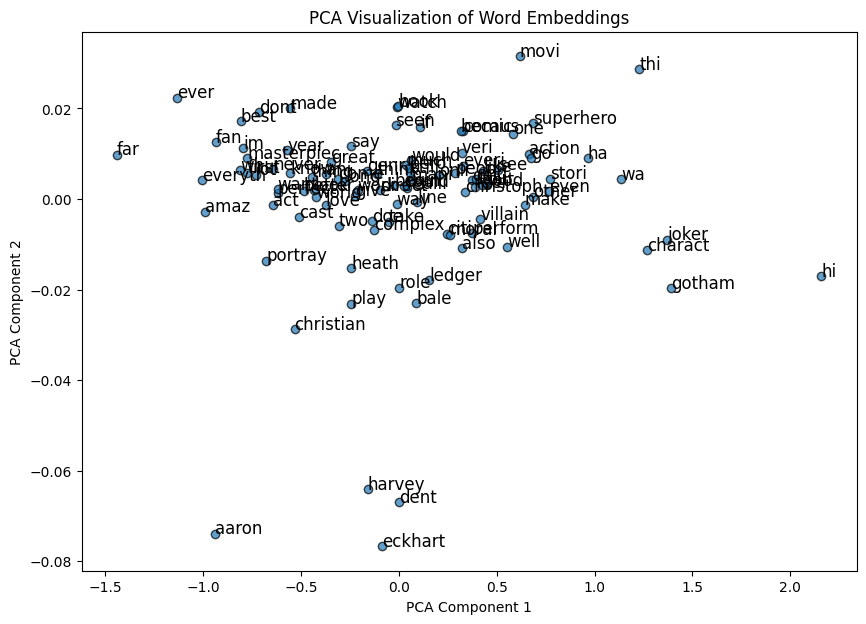

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

def train_and_visualize_word2vec(tokenized_texts, embedding_dim=300, top_n_words=100):
    """
    Trains a Word2Vec model and visualizes word embeddings using PCA.

    :param tokenized_texts: List of tokenized sentences from a dataframe column.
    :param embedding_dim: Dimension of word vectors (default: 300).
    :param top_n_words: Number of words to visualize (default: 100).
    """
    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=embedding_dim, window=5, min_count=2, workers=4, sg=0)
    word_vectors = w2v_model.wv

    # Extract top N words and their vectors
    vocab_words = list(word_vectors.index_to_key)[:top_n_words]
    word_embeddings = np.array([word_vectors[word] for word in vocab_words])

    # Reduce dimensionality using PCA
    pca_model = PCA(n_components=2)
    reduced_vectors = pca_model.fit_transform(word_embeddings)

    # Plot the word embeddings
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', alpha=0.7)

    # Annotate words on the plot
    for i, word in enumerate(vocab_words):
        plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=12)

    plt.title("PCA Visualization of Word Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Call the function with the tokenized text column
train_and_visualize_word2vec(df['tokens'])


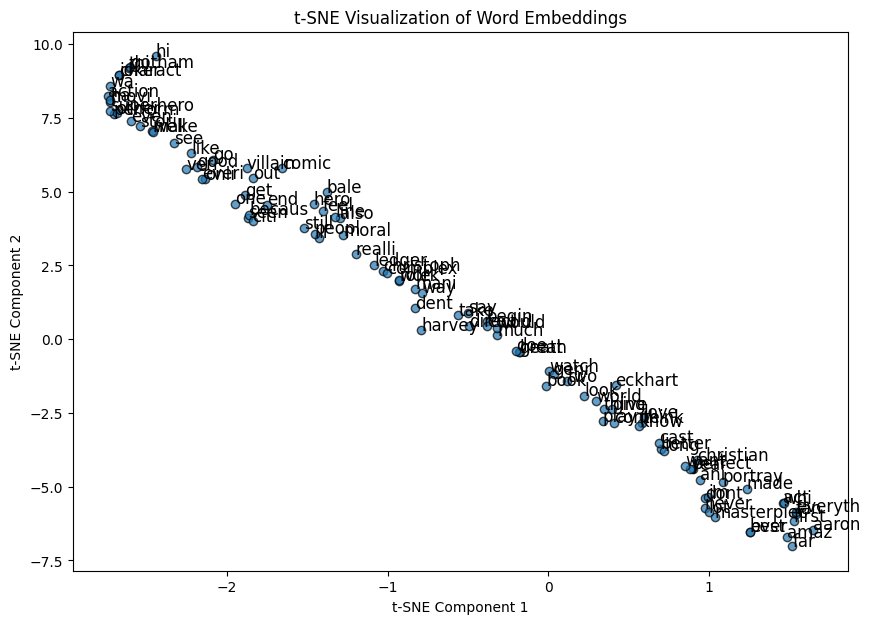

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

def train_and_visualize_tsne(tokenized_texts, embedding_dim=300, top_n_words=100, perplexity=30):
    """
    Trains a Word2Vec model and visualizes word embeddings using t-SNE.

    :param tokenized_texts: List of tokenized sentences from a dataframe column.
    :param embedding_dim: Dimension of word vectors (default: 300).
    :param top_n_words: Number of words to visualize (default: 100).
    :param perplexity: t-SNE perplexity parameter (default: 30).
    """
    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=embedding_dim, window=5, min_count=2, workers=4, sg=0)
    word_vectors = w2v_model.wv

    # Extract top N words and their vectors
    vocab_words = list(word_vectors.index_to_key)[:top_n_words]
    word_embeddings = np.array([word_vectors[word] for word in vocab_words])

    # Reduce dimensionality using t-SNE
    tsne_model = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_vectors = tsne_model.fit_transform(word_embeddings)

    # Plot the word embeddings
    plt.figure(figsize=(10, 7))
    plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], edgecolors='k', alpha=0.7)

    # Annotate words on the plot
    for i, word in enumerate(vocab_words):
        plt.text(tsne_vectors[i, 0], tsne_vectors[i, 1], word, fontsize=12)

    plt.title("t-SNE Visualization of Word Embeddings")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

# Call the function with the tokenized text column
train_and_visualize_tsne(df['tokens'])


In [57]:
from scipy.spatial.distance import cosine

word_comparisons = [
    ('movie', 'movie'),
    ('time', 'entropy'),
    ('blackhole', 'gravity'),
    ('war', 'survival'),
    ('illusion', 'prestige')
]

pair_index = 0
while pair_index < len(word_comparisons):
    word_a, word_b = word_comparisons[pair_index]

    if word_a in word_vectors and word_b in word_vectors:
        vector_a = word_vectors[word_a]
        vector_b = word_vectors[word_b]
        similarity_score = 1 - cosine(vector_a, vector_b)
        print(f"Cosine Similarity between '{word_a}' and '{word_b}': {similarity_score:.4f}")
    else:
        print(f"One or both words '{word_a}', '{word_b}' not in vocabulary.")

    pair_index += 1


One or both words 'movie', 'movie' not in vocabulary.
One or both words 'time', 'entropy' not in vocabulary.
One or both words 'blackhole', 'gravity' not in vocabulary.
One or both words 'war', 'survival' not in vocabulary.
One or both words 'illusion', 'prestige' not in vocabulary.


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [46]:
import pandas as pd

# Load the uploaded dataset
file_path = "reviews_cleaned (2).csv"
df_reviews = pd.read_csv(file_path)

# Display the first few rows of the dataset
df_reviews.head()


,review,Cleaned_text
0,Best movie ever. Heath ledger's work is phenom...,best movi ever heath ledger work is phenomen n...
1,This movie is a work of art. The finest sequel...,thi movi is a work of art the finest sequel ev...
2,It is just what you want for the best movie. G...,it is just what you want for the best movi gre...
3,"Confidently directed, dark, brooding, and pack...",confid direct dark brood and pack with impress...
4,We've been subjected to enormous amounts of hy...,weve been subject to enorm amount of hype and ...


In [48]:

positive_words_nolan = {
    "masterpiece", "brilliant", "stunning", "amazing", "phenomenal", "incredible",
    "exceptional", "mind-blowing", "thought-provoking", "outstanding", "cinematic",
    "powerful", "captivating", "compelling", "spectacular", "groundbreaking", "intelligent",
    "immersive", "innovative", "breathtaking", "genius", "visually", "masterful", "deep", "epic"
}

negative_words_nolan = {
    "boring", "overrated", "slow", "confusing", "predictable", "unrealistic",
    "disappointing", "messy", "exaggerated", "forced", "weak", "cliché", "dull",
    "underwhelming", "incoherent", "annoying", "flat", "shallow", "forgettable", "tedious"
}

neutral_words_nolan = {
    "movie", "film", "director", "cinematography", "performance", "actor", "script",
    "story", "plot", "soundtrack", "editing", "scene", "dialogue", "character", "visuals",
    "acting", "score", "camera", "runtime", "screenplay", "effects", "genre"
}

def determine_sentiment_nolan(text):
    words = set(text.lower().split())  # Convert text to lowercase and split into words

    if any(word in words for word in positive_words_nolan):
        return "Positive"
    elif any(word in words for word in negative_words_nolan):
        return "Negative"
    elif any(word in words for word in neutral_words_nolan):
        return "Neutral"
    else:
        return "Neutral"  # Default to Neutral if no match is found

# Apply sentiment analysis to the dataset
df_reviews['sentiment_nolan'] = df_reviews['Cleaned_text'].apply(determine_sentiment_nolan)

# Select necessary columns for the final dataset
df_sentiment_nolan = df_reviews[['review', 'Cleaned_text', 'sentiment_nolan']]

# Display the first few rows of the updated dataset
df_sentiment_nolan.head()


,review,Cleaned_text,sentiment_nolan
0,Best movie ever. Heath ledger's work is phenom...,best movi ever heath ledger work is phenomen n...,Neutral
1,This movie is a work of art. The finest sequel...,thi movi is a work of art the finest sequel ev...,Neutral
2,It is just what you want for the best movie. G...,it is just what you want for the best movi gre...,Neutral
3,"Confidently directed, dark, brooding, and pack...",confid direct dark brood and pack with impress...,Neutral
4,We've been subjected to enormous amounts of hy...,weve been subject to enorm amount of hype and ...,Neutral


In [49]:
sentiment_nolan_file_path = "nolan_movie_sentiment_analysis.csv"
df_sentiment_nolan.to_csv(sentiment_nolan_file_path, index=False)
sentiment_nolan_file_path


'nolan_movie_sentiment_analysis.csv'

In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/varaprasad7006/SatyaVaraPrasad_INFO5731_Spring2025024/blob/main/nolan_movie_sentiment_analysis.csv


The NLP task performed on the dataset is Sentiment Analysis, classifying reviews as Positive, Negative, or Neutral based on predefined keyword sets. The labeling schema relies on sentiment-related words: Positive reviews contain words like "masterpiece" and "brilliant", Negative reviews include "boring" and "disappointing", while Neutral reviews feature general movie-related terms like "cinematography" or "script" without strong sentiment. AI assistance was used only for refining the keyword selection to improve classification accuracy.

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

# Type your answer
In this ssignment i have learnt so many crucial things which gave me a decent clarity on ngrams bigrams and stuff like that and gained a good experience in labelling data and got to know about the importance of labeled data and it took me a lot of time to do this assignment which is quite not good more time should be provided